## Import Required Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, SpatialDropout1D

## Load the data

In [2]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = 10000)

## Look into the size of the data

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


## Take only the first 20 words from each review to speed up the training process

In [4]:
X_train_modified = []
for x in X_train:
    X_train_modified.append(x[:20])
    
X_test_modified = []
for x in X_test:
    X_test_modified.append(x[:20])

In [5]:
len(X_train_modified[0])

20

## Check if there is any review with less than 20 words and doo padding

In [6]:
for j in X_train_modified:
    if len(j) != 20:
        print(len(j))

19
16
11
11
19
12
15
13
18
16
16
13
16


In [7]:
X_train_modified = pad_sequences(X_train_modified, maxlen = 20, padding='post')
X_test_modified = pad_sequences(X_test_modified, maxlen = 20, padding='post')

## Print the shape of features and labels

In [8]:
print(X_train_modified.shape)
print(X_test_modified.shape)
print(y_train.shape)
print(y_test.shape)

(25000, 20)
(25000, 20)
(25000,)
(25000,)


In [9]:
print('negative value in test data: ' + str(len(y_test[y_test == 0])))
print('positive value in test data: ' + str(len(y_test[y_test == 1])))

negative value in test data: 12500
positive value in test data: 12500


In [10]:
print('Feature: ' + str(X_train_modified[0]))
print('Label: ' + str(y_train[0]))

Feature: [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25]
Label: 1


In [11]:
word_index = imdb.get_word_index()

In [12]:
index_word = {v: k for k, v in word_index.items()}

In [13]:
sentence = []
for x in X_train_modified[0]:
    sentence.append(index_word[x])

print('Feature: ' + ' '.join(sentence))
print('Label: ' + str(y_train[0]))

Feature: the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have
Label: 1


In [14]:
sentence = []
for x in X_train_modified[1]:
    sentence.append(index_word[x])

print('Feature: ' + ' '.join(sentence))
print('Label: ' + str(y_train[1]))

Feature: the thought solid thought senator do making to is spot nomination assumed while he of jack in where picked as
Label: 0


In [15]:
sentence = []
for x in X_test_modified[0]:
    sentence.append(index_word[x])

print('Feature: ' + ' '.join(sentence))
print('Label: ' + str(y_test[0]))

Feature: the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring
Label: 0


In [16]:
sentence = []
for x in X_test_modified[1]:
    sentence.append(index_word[x])

print('Feature: ' + ' '.join(sentence))
print('Label: ' + str(y_test[1]))

Feature: the as you world's is quite br mankind most that quest are chase to being quickly of little it time
Label: 1


In [17]:
y_train_modifed = pd.get_dummies(y_train).values
y_test_modified = pd.get_dummies(y_test).values

## LSTM

In [18]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(10000, embed_dim, input_length = 20))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 128)           1280000   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 20, 128)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 196)               254800    
_________________________________________________________________
dense (Dense)                (None, 2)                 394       
Total params: 1,535,194
Trainable params: 1,535,194
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
batch_size = 512
model.fit(X_train_modified, y_train_modifed, epochs = 10, batch_size=batch_size, verbose = 2, validation_data=(X_test_modified, y_test_modified))

Epoch 1/10
49/49 - 13s - loss: 0.6394 - accuracy: 0.6204 - val_loss: 0.5739 - val_accuracy: 0.6895
Epoch 2/10
49/49 - 11s - loss: 0.5083 - accuracy: 0.7474 - val_loss: 0.5672 - val_accuracy: 0.6959
Epoch 3/10
49/49 - 11s - loss: 0.4574 - accuracy: 0.7843 - val_loss: 0.5799 - val_accuracy: 0.6994
Epoch 4/10
49/49 - 13s - loss: 0.4161 - accuracy: 0.8070 - val_loss: 0.5932 - val_accuracy: 0.6924
Epoch 5/10
49/49 - 12s - loss: 0.3827 - accuracy: 0.8246 - val_loss: 0.6364 - val_accuracy: 0.6892
Epoch 6/10
49/49 - 12s - loss: 0.3521 - accuracy: 0.8423 - val_loss: 0.6878 - val_accuracy: 0.6849
Epoch 7/10
49/49 - 12s - loss: 0.3207 - accuracy: 0.8613 - val_loss: 0.7140 - val_accuracy: 0.6799
Epoch 8/10
49/49 - 12s - loss: 0.2965 - accuracy: 0.8723 - val_loss: 0.7686 - val_accuracy: 0.6770
Epoch 9/10
49/49 - 12s - loss: 0.2704 - accuracy: 0.8839 - val_loss: 0.8883 - val_accuracy: 0.6769
Epoch 10/10
49/49 - 12s - loss: 0.2491 - accuracy: 0.8934 - val_loss: 0.9145 - val_accuracy: 0.6713


In [20]:
score, acc = model.evaluate(X_test_modified, y_test_modified)
print(score)
print(acc)

782/782 [==============================] - 3s 4ms/step - loss: 0.9145 - accuracy: 0.6713
0.9145311713218689
0.671280026435852


## Vectorize the data

In [21]:
import numpy as np

def one_hot_encode(sequences, dimension=10000):
    # all zero matrix of shape (len(sequences), dimension)
    result = np.zeros((len(sequences), dimension))
    for i,sequence in enumerate(sequences):
        result[i, sequence] = 1
    return result

x_tr = one_hot_encode(X_train)
x_te = one_hot_encode(X_test)

y_tr = np.asarray(y_train).astype('float32')
y_te = np.asarray(y_test).astype('float32')

### Build Model

In [22]:
epochs = 10

model  = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])


In [23]:
history = model.fit(x_tr,
                    y_tr,
                    epochs=epochs,
                    batch_size=512,
                    validation_data=(x_te,y_te))

loss, acc = model.evaluate(x_te,y_te)
print(loss)
print(acc)

Epoch 1/10
49/49 [==============================] - 7s 137ms/step - loss: 0.4471 - acc: 0.8170 - val_loss: 0.3285 - val_acc: 0.8758
Epoch 2/10
49/49 [==============================] - 1s 26ms/step - loss: 0.2504 - acc: 0.9095 - val_loss: 0.2930 - val_acc: 0.8834
Epoch 3/10
49/49 [==============================] - 1s 24ms/step - loss: 0.1930 - acc: 0.9302 - val_loss: 0.2925 - val_acc: 0.8840
Epoch 4/10
49/49 [==============================] - 1s 24ms/step - loss: 0.1588 - acc: 0.9423 - val_loss: 0.3394 - val_acc: 0.8710
Epoch 5/10
49/49 [==============================] - 1s 23ms/step - loss: 0.1337 - acc: 0.9517 - val_loss: 0.3408 - val_acc: 0.8724
Epoch 6/10
49/49 [==============================] - 1s 22ms/step - loss: 0.1113 - acc: 0.9624 - val_loss: 0.3648 - val_acc: 0.8717
Epoch 7/10
49/49 [==============================] - 1s 23ms/step - loss: 0.0939 - acc: 0.9681 - val_loss: 0.3938 - val_acc: 0.8702
Epoch 8/10
49/49 [==============================] - 1s 24ms/step - loss: 0.0770 - 

## Plot training and validation accuracy vs epochs

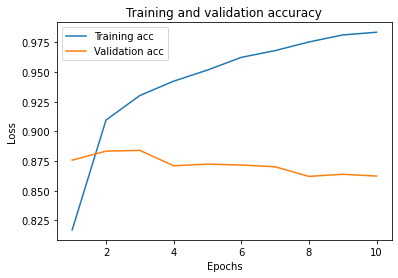

In [24]:
import matplotlib.pyplot as plt

plt.clf()

acc_values = history.history['acc']
val_acc_values = history.history['val_acc']
plt.plot(range(1, epochs + 1), acc_values, label='Training acc')
plt.plot(range(1, epochs + 1), val_acc_values, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### After 2 epochs it seems to be overfitting

## Find pos % and neg % for first 1000 test cases

In [72]:
pos_total, neg_total, pos_correct, neg_correct = 0, 0, 0, 0


for x in range(1000):
    result = np.round(model.predict(x_te[x].reshape(1,x_te.shape[1]),batch_size=1)[0], 0)[0]
    if result == y_te[x]:
        if y_te[x] == 0:
            neg_correct += 1
        else:
            pos_correct += 1
            
    if y_te[x] == 0:
        neg_total += 1
    else:
        pos_total += 1

print("pos_acc", pos_correct/pos_total*100, "%")
print("neg_acc", neg_correct/neg_total*100, "%")

pos_acc 85.65400843881856 %
neg_acc 87.26235741444867 %


## Predict on one sample

In [73]:
sentence = []
for x in X_test_modified[0]:
    sentence.append(index_word[x])

print('Feature: ' + ' '.join(sentence))
print('Label: ' + str(y_test[0]))

Feature: the wonder own as by is sequence i i and and to of hollywood br of down shouting getting boring
Label: 0


In [79]:
x_te[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [80]:
# test = pad_sequences(X_test_modified[0:1], maxlen = 20, padding='post')
output = np.argmax(model.predict(x_te[0].reshape(1,x_te.shape[1]),batch_size=1)[0])
print(output)

0


#### Output is 0 (negative) in both prediction and actual